<a href="https://colab.research.google.com/github/nxxk23/PROJECT/blob/main/BinaryVariable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/ckdresearch2023/Assign/SummaryFile/WideTable/WideTable.xlsx')
df = df.iloc[:, 1:]
df.head()

,PatientUID,PatientVisitUID,Slopes,G1M2:ARB,G3M1:Statin,G5M2:NSAIDs,G1M5:Diuretic,G1M7:Beta blocker,G1M3:Dihydropyridine CCB,G1M6:MRA,...,L14:WBC,Sex,Age,NATNL,Location,PricipalProblemCode,PricipalProblemName,InPatient,OutPatient,Emergency
0,2299,5812902,-7.158596,100,100,34,0,0,0,0,...,9.41,หญิง,75.0,ไทย,เวชปฏิบัติทั่วไป (OPD)-D03,239873007,Osteoarthritis of knee,0.0,1.0,0.0
1,2299,6947220,5.550691,35,0,1,35,0,0,0,...,NaN,หญิง,76.0,ไทย,เวชปฏิบัติทั่วไป (OPD)-D03,239873007,Osteoarthritis of knee,0.0,1.0,0.0
2,2299,8186767,-6.063710,100,0,15,0,0,0,0,...,5.42,หญิง,78.0,ไทย,เวชปฏิบัติทั่วไป (OPD)-D03,239873007,Osteoarthritis of knee,0.0,1.0,0.0
3,2299,9385133,-12.812245,90,0,0,0,0,0,0,...,NaN,หญิง,79.0,ไทย,เวชปฏิบัติทั่วไป (OPD)-D03,F411,Generalized anxiety disorder,0.0,1.0,0.0
4,2304,4916314,28.287500,0,0,0,0,0,0,0,...,NaN,หญิง,58.0,ไทย,หน่วยทะเบียนกลาง(Test พิเศษ)เวชศาสตร์ชันสูตร,NaN,NaN,0.0,1.0,0.0


## **Mode Location filled**

In [3]:
lab = pd.read_csv('/content/drive/MyDrive/ckdresearch2023/Lab.csv')

In [4]:
import pandas as pd

# Step 1: Compute mode of 'Location' for each 'PatientUID' in 'lab' table
mode_location = lab.groupby('PatientUID')['Location'].apply(lambda x: x.mode()[0]).reset_index()

# Step 2: Create a dictionary mapping 'PatientUID' to mode 'Location'
mode_dict = dict(zip(mode_location['PatientUID'], mode_location['Location']))

# Step 3: Fill null values in the 'Location' column of 'df' with the mode values
df['Location'] = df.apply(lambda row: mode_dict[row['PatientUID']] if pd.isnull(row['Location']) else row['Location'], axis=1)


In [5]:
data = pd.DataFrame(df)
remove = ['L12:Hemoglobin','L13:Hematocrit','L16:TIBC','L17:Tranferin SAT',
          'L18:Ferritin','L25:Parathyroid hormone','L26:Vitamin D','L27:UrineAlbumin/Cr ratio',
          'L28:UrineProtein/Cr ratio','L29:UrineVolume (24hrs)','L30:UrineUrea (24hrs)',
          'L31:UrineSodium (24hrs)','L32:UrineProtein (24hrs)']
data = data.drop(remove, axis=1)

## **Hand Filled**

In [6]:
data['Age'] = data['Age'].fillna('69')
data['Sex'] = data['Sex'].fillna('หญิง')
data['NATNL'] = data['NATNL'].fillna('ไทย')
data['InPatient'] = data['InPatient'].fillna(0)
data['OutPatient'] = data['OutPatient'].fillna(1)
data['Emergency'] = data['Emergency'].fillna(0)
data['PricipalProblemCode'] = data['PricipalProblemCode'].fillna('None')
data['PricipalProblemName'] = data['PricipalProblemName'].fillna('None')

**Check null columns and convert DataType**

In [7]:
columns_with_null = data.columns[data.isnull().any()].tolist()
print(columns_with_null)

['Systolic BP', 'Diastolic BP', 'BMI', 'BSA', 'L2:BUN', 'L3:Creatinine', 'L4:Sodium', 'L5:Potassium', 'L6:Chloride', 'L7:Bicarbonate', 'L8:Uric', 'L9:Calcium', 'L10:Phosphorus', 'L11:Albumin', 'L15:Platelet', 'L19:Blood sugar', 'L20:HbA1c', 'L21:Cholesterol', 'L22:Triglyceride', 'L23:LDL Cholesterol', 'L24:HDL Cholesterol', 'L14:WBC']


In [8]:
columns_to_impute = ['Systolic BP', 'Diastolic BP', 'BMI', 'BSA',
                     'L2:BUN','L3:Creatinine','L4:Sodium','L5:Potassium','L6:Chloride','L7:Bicarbonate',
                     'L8:Uric', 'L9:Calcium', 'L10:Phosphorus','L11:Albumin', 'L14:WBC', 'L15:Platelet',
                     'L19:Blood sugar','L20:HbA1c','L21:Cholesterol','L22:Triglyceride', 'L23:LDL Cholesterol', 'L24:HDL Cholesterol']
data[columns_to_impute]

,Systolic BP,Diastolic BP,BMI,BSA,L2:BUN,L3:Creatinine,L4:Sodium,L5:Potassium,L6:Chloride,L7:Bicarbonate,...,L10:Phosphorus,L11:Albumin,L14:WBC,L15:Platelet,L19:Blood sugar,L20:HbA1c,L21:Cholesterol,L22:Triglyceride,L23:LDL Cholesterol,L24:HDL Cholesterol
0,138,76,20.72,1.38,6.5,0.82,143,3.8,103,29.7,...,NaN,NaN,9.41,313,100,5.3,193,62,129.0,65
1,134,66,20.27,1.36,NaN,0.88,NaN,4.3,NaN,NaN,...,NaN,NaN,NaN,NaN,89,NaN,205,69,139.0,76
2,103,57,19.05,1.33,14.5,1.10,141,4.4,102,27.2,...,NaN,NaN,5.42,434,88,5.5,198,74,129.0,60
3,128,62,NaN,NaN,15.4,0.72,131,4.2,96,28.2,...,NaN,NaN,NaN,NaN,93,5.3,179,71,100.0,68
4,NaN,NaN,NaN,NaN,20.8,1.08,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,111,6.2,143,97,89.0,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52614,147,87,NaN,NaN,NaN,2.04,137,4.6,99,27.4,...,NaN,NaN,NaN,NaN,135,6.6,181,146,98.0,48
52615,143,86,NaN,NaN,28.3,1.87,141,5.2,104,23.5,...,4.0,4.2,NaN,NaN,133,7.2,125,104,62.0,47
52616,131,79,NaN,NaN,15.5,1.09,141,4.4,110,19.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52617,138,NaN,NaN,NaN,40.8,2.14,126,4.5,90,22.6,...,NaN,3.2,18.70,298,NaN,NaN,121,NaN,NaN,NaN


In [9]:
# Display data types before conversion
print(data[columns_to_impute].dtypes)

Systolic BP             object
Diastolic BP            object
BMI                     object
BSA                     object
L2:BUN                 float64
L3:Creatinine          float64
L4:Sodium               object
L5:Potassium            object
L6:Chloride             object
L7:Bicarbonate          object
L8:Uric                float64
L9:Calcium              object
L10:Phosphorus          object
L11:Albumin             object
L14:WBC                 object
L15:Platelet            object
L19:Blood sugar         object
L20:HbA1c               object
L21:Cholesterol         object
L22:Triglyceride        object
L23:LDL Cholesterol    float64
L24:HDL Cholesterol     object
dtype: object


In [10]:
import pandas as pd
import numpy as np
import re
# Function to check for alphabet values
def contains_alphabet(s):
    if isinstance(s, str):
        return any(c.isalpha() for c in s)
    return False

# Iterate over each column to find alphabet values
for column in columns_to_impute:
    alphabet_values = data[column][data[column].apply(contains_alphabet)]
    print(f"Alphabet values in column '{column}': {alphabet_values.tolist()}")

Alphabet values in column 'Systolic BP': ['150วัดที่บ้าน', '145วัดมาจากที่บ้าน', 'วัดไม่ได้', '147 (ยังไม่ทานยาความดัน)', 'วัดไม่ได้', 'วัดไม่ได้', '210เวลา11.45น.', '133ที่บ้าน', 'วัดไม่ได้']
Alphabet values in column 'Diastolic BP': ['108 map 134', '60 map68', '105 map121', '119 MAP140', '87map128', '66 MAP 72', '64 map 74', '105map138', '95 map 138', '52 map62', '44 map 52', '47(map59)', '78-83ที่บ้าน', '60 MAP68', '44 map 59', 'วัดไม่ได้', '103 map174', '65 ที่บ้านหลังกินยา', '130 MAP142', '78z', '99 MAP111', '100 MAP125', 'วัดไม่ได้', '107  map 130', '39 map68', '104 MAP134', '83ที่บ้าน', '35map64', '80 MAP115']
Alphabet values in column 'BMI': ['รถนั่ง', '0NaN']
Alphabet values in column 'BSA': []
Alphabet values in column 'L2:BUN': []
Alphabet values in column 'L3:Creatinine': []
Alphabet values in column 'L4:Sodium': ['Not detected', 'ND']
Alphabet values in column 'L5:Potassium': ['Not detected', 'ND', 'ND']
Alphabet values in column 'L6:Chloride': ['Not detected', 'ND']
Alpha

In [11]:
# Function to replace alphabets with NaN and convert to numeric
def replace_alphabets_with_nan_and_convert_to_numeric(s):
    if isinstance(s, str):
        if any(c.isalpha() for c in s):
            return np.nan
        else:
            return pd.to_numeric(s, errors='coerce')
    else:
        return s

# Iterate over each column to replace alphabets and convert to numeric
for column in columns_to_impute:
    data[column] = data[column].apply(replace_alphabets_with_nan_and_convert_to_numeric)

In [12]:
data[columns_to_impute].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52619 entries, 0 to 52618
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Systolic BP          47703 non-null  float64
 1   Diastolic BP         47654 non-null  float64
 2   BMI                  37791 non-null  float64
 3   BSA                  37794 non-null  float64
 4   L2:BUN               39112 non-null  float64
 5   L3:Creatinine        52618 non-null  float64
 6   L4:Sodium            31809 non-null  float64
 7   L5:Potassium         34223 non-null  float64
 8   L6:Chloride          31721 non-null  float64
 9   L7:Bicarbonate       31900 non-null  float64
 10  L8:Uric              13983 non-null  float64
 11  L9:Calcium           12725 non-null  float64
 12  L10:Phosphorus       12375 non-null  float64
 13  L11:Albumin          23444 non-null  float64
 14  L14:WBC              30149 non-null  float64
 15  L15:Platelet         30149 non-null 

**Add One Binary Variable**


```
* Mode = If the data type is 'object'.
* Mean = If the data type is numeric (not 'object') and dont have outlier
* Median = If the data type is numeric (not 'object') and have outlier

```



> **All column have oulier**



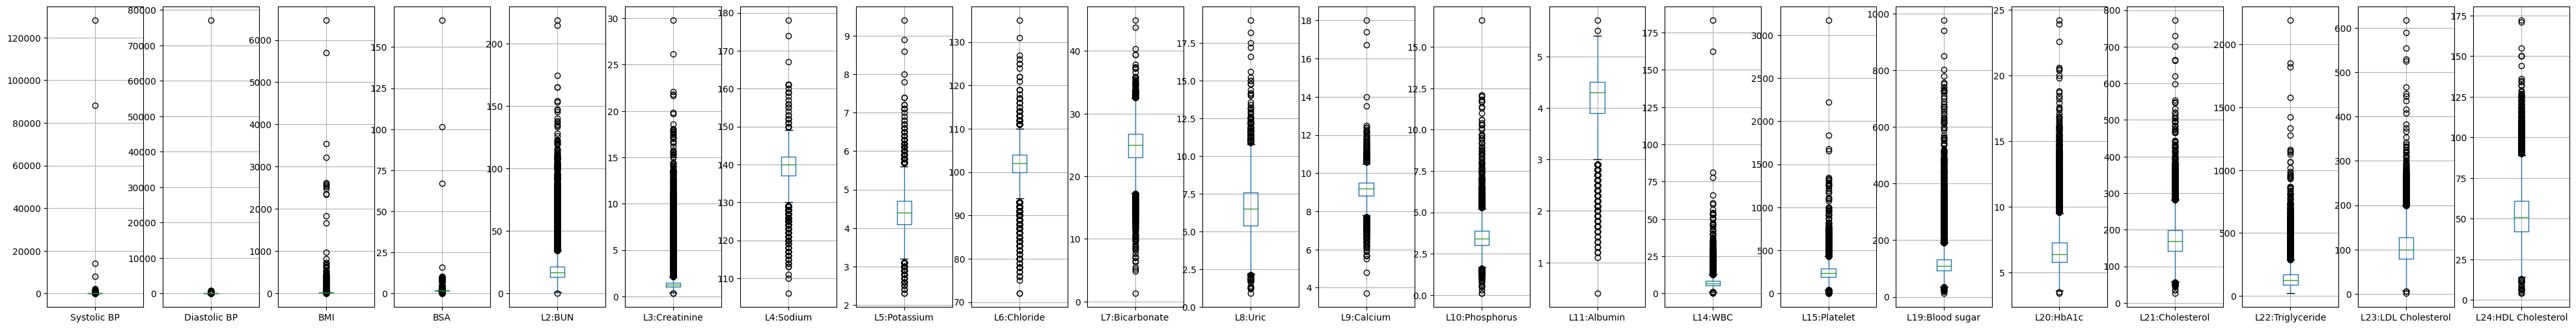

In [13]:
import matplotlib.pyplot as plt

# Create a subplot for each column with adjusted width
fig, axes = plt.subplots(nrows=1, ncols=len(columns_to_impute), figsize=(50, 6))

for idx, column in enumerate(columns_to_impute):
    data[[column]].boxplot(ax=axes[idx])
    #axes[idx].set_title(f'Boxplot of {column}')

plt.show()

In [14]:
# Function to identify columns with outliers
def detect_outliers(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Check for outliers in each column
for column in columns_to_impute:
    outliers = detect_outliers(data, column)
    if not outliers.empty:
        print(f"Column '{column}' has outliers.")
    else:
        print(f"Column '{column}' does not have outliers.")

Column 'Systolic BP' has outliers.
Column 'Diastolic BP' has outliers.
Column 'BMI' has outliers.
Column 'BSA' has outliers.
Column 'L2:BUN' has outliers.
Column 'L3:Creatinine' has outliers.
Column 'L4:Sodium' has outliers.
Column 'L5:Potassium' has outliers.
Column 'L6:Chloride' has outliers.
Column 'L7:Bicarbonate' has outliers.
Column 'L8:Uric' has outliers.
Column 'L9:Calcium' has outliers.
Column 'L10:Phosphorus' has outliers.
Column 'L11:Albumin' has outliers.
Column 'L14:WBC' has outliers.
Column 'L15:Platelet' has outliers.
Column 'L19:Blood sugar' has outliers.
Column 'L20:HbA1c' has outliers.
Column 'L21:Cholesterol' has outliers.
Column 'L22:Triglyceride' has outliers.
Column 'L23:LDL Cholesterol' has outliers.
Column 'L24:HDL Cholesterol' has outliers.


In [15]:
#Function to add binary indicator column for missing values
def add_missing_indicator(data, column):
    missing_indicator = data[column].isnull().astype(int)
    indicator_column_name = f'{column}_missing'
    data[indicator_column_name] = missing_indicator

# Function to identify columns with outliers and impute with median
def impute_with_median(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    if (data[column] < lower_bound).any() or (data[column] > upper_bound).any():
        data[column].fillna(data[column].median(), inplace=True)

In [16]:
# Sort the columns alphabetically
columns_to_impute.sort()

# Create a dictionary to store the imputation method for each column
imputation_methods = {}

# Split the data into four DataFrames
# 1. Original DataFrame
original_data = data.copy()

# 2. DataFrame with binary indicators
data_with_binary = data.copy()
for column in columns_to_impute:
    add_missing_indicator(data_with_binary, column)

# 3. DataFrame with automatic median imputation + binary indicators
data_with_imputation = data.copy()
for column in columns_to_impute:
    imputation_method = 'median'  # Impute with median for all columns due to outliers
    imputation_methods[column] = imputation_method
    data_with_imputation[column].fillna(data_with_imputation[column].median(), inplace=True)
    add_missing_indicator(data_with_imputation, column)

# 4. DataFrame with only automatic median imputation
data_with_only_imputation = data.copy()
for column in columns_to_impute:
    imputation_method = 'median'  # Impute with median for all columns due to outliers
    imputation_methods[column] = imputation_method
    data_with_only_imputation[column].fillna(data_with_only_imputation[column].median(), inplace=True)

# Print the imputation methods for each column
print("\nImputation Methods:")
for column, method in imputation_methods.items():
    print(f"{column}: {method}")



Imputation Methods:
BMI: median
BSA: median
Diastolic BP: median
L10:Phosphorus: median
L11:Albumin: median
L14:WBC: median
L15:Platelet: median
L19:Blood sugar: median
L20:HbA1c: median
L21:Cholesterol: median
L22:Triglyceride: median
L23:LDL Cholesterol: median
L24:HDL Cholesterol: median
L2:BUN: median
L3:Creatinine: median
L4:Sodium: median
L5:Potassium: median
L6:Chloride: median
L7:Bicarbonate: median
L8:Uric: median
L9:Calcium: median
Systolic BP: median


In [17]:
original_data[columns_to_impute]

,BMI,BSA,Diastolic BP,L10:Phosphorus,L11:Albumin,L14:WBC,L15:Platelet,L19:Blood sugar,L20:HbA1c,L21:Cholesterol,...,L24:HDL Cholesterol,L2:BUN,L3:Creatinine,L4:Sodium,L5:Potassium,L6:Chloride,L7:Bicarbonate,L8:Uric,L9:Calcium,Systolic BP
0,20.72,1.38,76.0,NaN,NaN,9.41,313.0,100.0,5.3,193.0,...,65.0,6.5,0.82,143.0,3.8,103.0,29.7,NaN,NaN,138.0
1,20.27,1.36,66.0,NaN,NaN,NaN,NaN,89.0,NaN,205.0,...,76.0,NaN,0.88,NaN,4.3,NaN,NaN,NaN,NaN,134.0
2,19.05,1.33,57.0,NaN,NaN,5.42,434.0,88.0,5.5,198.0,...,60.0,14.5,1.10,141.0,4.4,102.0,27.2,NaN,NaN,103.0
3,NaN,NaN,62.0,NaN,NaN,NaN,NaN,93.0,5.3,179.0,...,68.0,15.4,0.72,131.0,4.2,96.0,28.2,NaN,NaN,128.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,111.0,6.2,143.0,...,51.0,20.8,1.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52614,NaN,NaN,87.0,NaN,NaN,NaN,NaN,135.0,6.6,181.0,...,48.0,NaN,2.04,137.0,4.6,99.0,27.4,NaN,NaN,147.0
52615,NaN,NaN,86.0,4.0,4.2,NaN,NaN,133.0,7.2,125.0,...,47.0,28.3,1.87,141.0,5.2,104.0,23.5,NaN,9.2,143.0
52616,NaN,NaN,79.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,15.5,1.09,141.0,4.4,110.0,19.4,10.9,NaN,131.0
52617,NaN,NaN,NaN,NaN,3.2,18.70,298.0,NaN,NaN,121.0,...,NaN,40.8,2.14,126.0,4.5,90.0,22.6,7.3,NaN,138.0


In [18]:
# 2. DataFrame with binary indicators
data_with_binary

,PatientUID,PatientVisitUID,Slopes,G1M2:ARB,G3M1:Statin,G5M2:NSAIDs,G1M5:Diuretic,G1M7:Beta blocker,G1M3:Dihydropyridine CCB,G1M6:MRA,...,L24:HDL Cholesterol_missing,L2:BUN_missing,L3:Creatinine_missing,L4:Sodium_missing,L5:Potassium_missing,L6:Chloride_missing,L7:Bicarbonate_missing,L8:Uric_missing,L9:Calcium_missing,Systolic BP_missing
0,2299,5812902,-7.158596,100,100,34,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,2299,6947220,5.550691,35,0,1,35,0,0,0,...,0,1,0,1,0,1,1,1,1,0
2,2299,8186767,-6.063710,100,0,15,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,2299,9385133,-12.812245,90,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
4,2304,4916314,28.287500,0,0,0,0,0,0,0,...,0,0,0,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52614,3319961,10553903,10.568365,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
52615,3319971,10553916,-4.256753,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
52616,3320048,10572126,-0.692078,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
52617,3320050,10572565,7.217875,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [19]:
# 3. DataFrame with automatic imputation (median, mode, mean) + binary indicators
data_with_imputation

,PatientUID,PatientVisitUID,Slopes,G1M2:ARB,G3M1:Statin,G5M2:NSAIDs,G1M5:Diuretic,G1M7:Beta blocker,G1M3:Dihydropyridine CCB,G1M6:MRA,...,L24:HDL Cholesterol_missing,L2:BUN_missing,L3:Creatinine_missing,L4:Sodium_missing,L5:Potassium_missing,L6:Chloride_missing,L7:Bicarbonate_missing,L8:Uric_missing,L9:Calcium_missing,Systolic BP_missing
0,2299,5812902,-7.158596,100,100,34,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2299,6947220,5.550691,35,0,1,35,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2299,8186767,-6.063710,100,0,15,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2299,9385133,-12.812245,90,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2304,4916314,28.287500,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52614,3319961,10553903,10.568365,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
52615,3319971,10553916,-4.256753,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
52616,3320048,10572126,-0.692078,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
52617,3320050,10572565,7.217875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
data_with_only_imputation[columns_to_impute]

,BMI,BSA,Diastolic BP,L10:Phosphorus,L11:Albumin,L14:WBC,L15:Platelet,L19:Blood sugar,L20:HbA1c,L21:Cholesterol,...,L24:HDL Cholesterol,L2:BUN,L3:Creatinine,L4:Sodium,L5:Potassium,L6:Chloride,L7:Bicarbonate,L8:Uric,L9:Calcium,Systolic BP
0,20.72,1.38,76.0,3.4,4.3,9.41,313.0,100.0,5.3,193.0,...,65.0,6.5,0.82,143.0,3.8,103.0,29.7,6.5,9.2,138.0
1,20.27,1.36,66.0,3.4,4.3,6.73,234.0,89.0,6.4,205.0,...,76.0,16.7,0.88,140.0,4.3,102.0,25.0,6.5,9.2,134.0
2,19.05,1.33,57.0,3.4,4.3,5.42,434.0,88.0,5.5,198.0,...,60.0,14.5,1.10,141.0,4.4,102.0,27.2,6.5,9.2,103.0
3,24.35,1.65,62.0,3.4,4.3,6.73,234.0,93.0,5.3,179.0,...,68.0,15.4,0.72,131.0,4.2,96.0,28.2,6.5,9.2,128.0
4,24.35,1.65,71.0,3.4,4.3,6.73,234.0,111.0,6.2,143.0,...,51.0,20.8,1.08,140.0,4.4,102.0,25.0,6.5,9.2,138.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52614,24.35,1.65,87.0,3.4,4.3,6.73,234.0,135.0,6.6,181.0,...,48.0,16.7,2.04,137.0,4.6,99.0,27.4,6.5,9.2,147.0
52615,24.35,1.65,86.0,4.0,4.2,6.73,234.0,133.0,7.2,125.0,...,47.0,28.3,1.87,141.0,5.2,104.0,23.5,6.5,9.2,143.0
52616,24.35,1.65,79.0,3.4,4.3,6.73,234.0,108.0,6.4,168.0,...,51.0,15.5,1.09,141.0,4.4,110.0,19.4,10.9,9.2,131.0
52617,24.35,1.65,71.0,3.4,3.2,18.70,298.0,108.0,6.4,121.0,...,51.0,40.8,2.14,126.0,4.5,90.0,22.6,7.3,9.2,138.0


In [21]:
data_with_only_imputation[columns_to_impute]

,BMI,BSA,Diastolic BP,L10:Phosphorus,L11:Albumin,L14:WBC,L15:Platelet,L19:Blood sugar,L20:HbA1c,L21:Cholesterol,...,L24:HDL Cholesterol,L2:BUN,L3:Creatinine,L4:Sodium,L5:Potassium,L6:Chloride,L7:Bicarbonate,L8:Uric,L9:Calcium,Systolic BP
0,20.72,1.38,76.0,3.4,4.3,9.41,313.0,100.0,5.3,193.0,...,65.0,6.5,0.82,143.0,3.8,103.0,29.7,6.5,9.2,138.0
1,20.27,1.36,66.0,3.4,4.3,6.73,234.0,89.0,6.4,205.0,...,76.0,16.7,0.88,140.0,4.3,102.0,25.0,6.5,9.2,134.0
2,19.05,1.33,57.0,3.4,4.3,5.42,434.0,88.0,5.5,198.0,...,60.0,14.5,1.10,141.0,4.4,102.0,27.2,6.5,9.2,103.0
3,24.35,1.65,62.0,3.4,4.3,6.73,234.0,93.0,5.3,179.0,...,68.0,15.4,0.72,131.0,4.2,96.0,28.2,6.5,9.2,128.0
4,24.35,1.65,71.0,3.4,4.3,6.73,234.0,111.0,6.2,143.0,...,51.0,20.8,1.08,140.0,4.4,102.0,25.0,6.5,9.2,138.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52614,24.35,1.65,87.0,3.4,4.3,6.73,234.0,135.0,6.6,181.0,...,48.0,16.7,2.04,137.0,4.6,99.0,27.4,6.5,9.2,147.0
52615,24.35,1.65,86.0,4.0,4.2,6.73,234.0,133.0,7.2,125.0,...,47.0,28.3,1.87,141.0,5.2,104.0,23.5,6.5,9.2,143.0
52616,24.35,1.65,79.0,3.4,4.3,6.73,234.0,108.0,6.4,168.0,...,51.0,15.5,1.09,141.0,4.4,110.0,19.4,10.9,9.2,131.0
52617,24.35,1.65,71.0,3.4,3.2,18.70,298.0,108.0,6.4,121.0,...,51.0,40.8,2.14,126.0,4.5,90.0,22.6,7.3,9.2,138.0


In [22]:
data_with_only_imputation.to_excel('automic_impute.xlsx')